<h1 align="center">RANDOMIZED ALGORITHM FOR SORTING AN ARRAY OR LIST</h1>
<h3 align="center">Project Topic 2</h3>
<h3 align="center">UMBC DATA690 - Data Structures and Algorithms</h3>
<h4 align="center">Spring 2025</h4>
<h4 align="right">Dr. Ajinkya Borle</h4>
<h4 align="left">Pavan Kumar Kollipara (XK77497)</h4>
<h4 align="left">Sairam Prudhvi Karri (BA13810)</h4>
<h4 align="left">Monika Alla (RS82696)</h4>
<h4 align="left">Srija Adapa (UG87574)</h4>

---

<h1 align="center">Comparative Study of Randomized Sorting Algorithms for Real-Time Leaderboard Management</h1>
<h3 align="center">Project Agenda</h3>


1. <strong>Dataset (Synthetic Data)</strong>  
   - Generate a dataset of 10,000 synthetic players.  
   - Each player entry includes:  
     - Player ID  
     - Name  
     - Scores (Round 1 to Round 100)  
   - Save the data to a CSV file (<code>player_scores.csv</code>).

2. <strong>Database Setup</strong>  
   - Create and configure an SQLite database.  
   - Store the top 5 player details for each of the 100 rounds in the database.

3. <strong>Sorting Scores with Multiple Algorithms</strong>  
   - Sort the score arrays for each round (10,000 elements) using four different sorting algorithms.  
   - Store the top 5 players for each round, and the top 5 players based on total scores, in the database.  
   - The algorithms used are:  
     1. Randomized Radix Sort  
     2. Sample Sort  
     3. Randomized Heap Sort  
     4. Randomized Shell Sort  

4. <strong>Performance Evaluation</strong>  
   - Measure the average execution time and peak memory usage for each algorithm.  
   - Compare and analyze the performance metrics.

5. <strong>Visualization</strong>  
   - Create visualizations to compare the computational performance of the four algorithms.

6. <strong>Web App</strong>  
   - Develop a simple web application using the Streamlit framework to display player rankings.  
   - By default, it displays the top 5 players based on total scores across 100 rounds.  
   - Users can select any round to view the top 5 players for that round.

---

<h1 align="center">Setup</h1>

### Install required packages

In [1]:
!python3 --version

Python 3.13.3


In [2]:
!python3 -m pip install faker streamlit -q

### Import required packages

In [3]:
from faker import Faker
import matplotlib.pyplot as plt
import pandas as pd
import random
import sqlite3
import threading
import time
import tracemalloc

### Helper Functions

In [4]:
def wrapped(unwrapped: str, str_len: int, max_str_len: int) -> str:
    """ Pretty Print """
    return unwrapped + (max_str_len - str_len) * " "


def display_head():
    """ Display Top 10 Rows of TopPlayers Table """
    conn = sqlite3.connect('player_rankings.db')
    df = pd.read_sql_query("SELECT * FROM TopPlayers LIMIT 10", conn)
    conn.close()
    return df

### Data Preparation

- Generates synthetic data for 10,000 players, each with a unique player ID and a randomly generated name using the `Faker` library.

- Assigns unique random scores to all players for each round (e.g., Round 1 and Round 2) to simulate competitive score distributions.

- Creates and saves a DataFrame with player details and scores to a CSV file named `player_scores.csv` for further use or analysis.

In [5]:
fake = Faker()
num_players = 10000 # number of players
num_rounds = 100 # number of rounds

# Generate player IDs and names
player_ids = [f"player_{i}" for i in range(1, num_players + 1)]
player_names = [fake.name() for _ in range(num_players)]

# Initialize dataframe
data = {
    "Player ID": player_ids,
    "Player Name": player_names,
}

# For each round, generate unique scores and assign randomly to players
for round_num in range(1, num_rounds + 1):
    scores = list(range(1, num_players + 1))  # unique scores from 1 to 10000
    random.shuffle(scores)  # shuffle to simulate randomness
    data[f"Round {round_num}"] = scores

# Create DataFrame
scores_df = pd.DataFrame(data)

# Save to CSV
csv_path_unique = "player_scores.csv"
scores_df.to_csv(csv_path_unique, index=False)

In [6]:
scores_df['Player Name'].unique()

array(['Victor Sanchez', 'Katrina Scott', 'Vanessa Garcia', ...,
       'Rachel Garner', 'Paul Gomez', 'Tara Davila'],
      shape=(9363,), dtype=object)

In [7]:
scores_df.tail()

,Player ID,Player Name,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,...,Round 91,Round 92,Round 93,Round 94,Round 95,Round 96,Round 97,Round 98,Round 99,Round 100
9995,player_9996,Joshua Rivera,47,6009,3017,8415,2109,8622,8523,2448,...,3720,8049,6854,3663,6898,8351,551,7863,4311,6433
9996,player_9997,Michelle Daniels,988,9042,4047,2147,8053,4853,2612,8938,...,4908,2469,5951,1173,7059,3436,5725,7415,7503,148
9997,player_9998,Rachel Garner,4131,2375,1194,6046,6939,3627,6752,967,...,2867,3637,6545,2279,532,7759,1213,1597,8315,4477
9998,player_9999,Paul Gomez,1557,842,571,8163,6263,5276,7261,5547,...,9354,6433,4645,6792,8028,1510,5729,3115,543,9581
9999,player_10000,Tara Davila,1781,4363,1287,5925,1146,8494,3043,828,...,1887,1199,5627,1417,6842,4531,103,5326,648,8491


##### Players Scores List
- Creates a list of player-score `[[(player_ID, score)...n]...n]`tuples for each round by zipping player IDs with their respective scores.
- Appends each round's data to the `players_score_list`, resulting in a list of lists where each sublist represents one round's player scores.

In [8]:
players_score_list = []

# Assuming df has columns: 'Player ID', 'Player Name', 'Round 1', ..., 'Round 100'
for i in range(1, num_rounds+1):  # Iterating from Round 1 to Round 100
    round_col = f'Round {i}'
    round_list = list(zip(scores_df['Player ID'], scores_df[round_col]))
    players_score_list.append(round_list)

print("Sample from Round 1:", players_score_list[0][:5])  # Print first 5 entries from Round 1

Sample from Round 1: [('player_1', 1790), ('player_2', 3492), ('player_3', 8949), ('player_4', 9347), ('player_5', 7553)]


---

<h1 align="center">Implementation</h1>

##### Four randomized sorting algorithms, Radix Sort, Sample Sort, Heap Sort, and Shell Sort, used for efficiently sorting player score data. Each algorithm introduces randomness through input shuffling and improves performance by leveraging multithreading, which allows different portions of the array to be sorted concurrently. Multithreading helps reduce execution time by utilizing multiple CPU cores, making the sorting process faster and more efficient, especially for large datasets. This parallelized approach is well-suited for real-time leaderboard systems where quick and scalable data processing is crucial.

### **1. Randomized Radix Sort**

<p align="center">
  <img width="500" height="" src="Docs/RadixSort.avif">
</p>

This is a multithreaded, randomized version of Radix Sort. It first shuffles the input to avoid worst-case scenarios (helpful in randomized algorithms), splits the array into two halves, sorts each half using Radix Sort in parallel threads, and then merges the sorted halves manually using a custom merge function.

**Time Complexity**
- The algorithm runs in **O(d × (n + k))**, where d is the number of digits in the maximum number, n is the number of elements, and k is the base (typically 10). The merge step adds **O(n)** time.

**Applications**
- This approach is useful for sorting large sets of integers, such as timestamps, IDs, or log entries. It’s effective where stable sorting and fast performance are required.

**Advantages**
- It avoids comparison-based limits, is stable, works well on fixed-digit integers, and benefits from multithreading. Randomization helps improve average-case performance.

**Disadvantages**
- It uses extra space and is limited to digit-based data like integers. Threading adds overhead and may not fully utilize CPU cores due to Python’s GIL.

In [9]:
def counting_sort(arr, exp):
    n = len(arr)
    output = [None] * n
    count = [0] * 10
    for i in range(n):
        index = arr[i][1] // exp
        count[(index % 10)] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    for i in range(n - 1, -1, -1):
        index = arr[i][1] // exp
        output[count[(index % 10)] - 1] = arr[i]
        count[(index % 10)] -= 1
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr: return
    max_val = max(arr, key=lambda x: x[1])[1]
    exp = 1
    while max_val // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

# Manual merge of two sorted lists
def merge_sorted_lists(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i][1] <= right[j][1]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def randomized_radix_sort(arr):
    random.shuffle(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    t1 = threading.Thread(target=radix_sort, args=(left,))
    t2 = threading.Thread(target=radix_sort, args=(right,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    arr[:] = merge_sorted_lists(left, right)

### **2. Sample Sort**

<p align="center">
  <img width="500" height="" src="Docs/SampleSort.PNG">
</p>

This is a multithreaded, randomized version of Sample Sort. It selects a small random sample from the array to estimate a pivot, partitions the array into three segments (less than, equal to, and greater than the pivot), then recursively sorts the "low" and "high" segments in parallel using threads before combining the results.

**Time Complexity**
- The average-case time complexity is **O(n log n)**, assuming good pivot selection from the random sample. Worst-case time is **O(n²)** if the pivot leads to unbalanced partitions, though this is rare due to random sampling. Threading helps reduce wall-clock time on multicore systems.

**Applications**
- his algorithm is well-suited for large datasets where fast average-case performance is acceptable and parallel execution can be leveraged, such as in distributed or parallel sorting tasks.

**Advantages**
- Fast average performance, benefits from multithreading, and works on general key-value data. Random pivot selection reduces the chance of poor partitioning.

**Disadvantages**
- Worst-case time can degrade to O(n²). Threading overhead and Python’s GIL may limit performance gains. Additional memory is needed for recursion and partitioning.


In [10]:
def sample_sort(arr):
    if len(arr) <= 1:
        return arr
    sample = random.sample(arr, min(10, len(arr)))
    pivot = sum(x[1] for x in sample) // len(sample)
    low = [x for x in arr if x[1] < pivot]
    mid = [x for x in arr if x[1] == pivot]
    high = [x for x in arr if x[1] > pivot]
    sorted_low = []
    sorted_high = []
    def sort_low():
        nonlocal sorted_low
        sorted_low = sample_sort(low)
    def sort_high():
        nonlocal sorted_high
        sorted_high = sample_sort(high)
    t1 = threading.Thread(target=sort_low)
    t2 = threading.Thread(target=sort_high)
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    return sorted_low + mid + sorted_high

### **3. Randomized HeapSort**

<p align="center">
  <img width="500" height="" src="Docs/HeapSort.webp">
</p>

This is a randomized, multithreaded version of Heap Sort. It starts by shuffling the array to improve performance in cases where input data may be ordered or patterned. Then it builds a max heap using a separate thread and performs the standard Heap Sort by repeatedly extracting the maximum element and heapifying the remaining elements.

**Time Complexity**
- The overall time complexity is **O(n log n)** in both the average and worst case. Building the heap takes O(n), and each of the n extractions involves a log n heapify operation. Random shuffling adds O(n) but helps avoid performance degradation on already sorted or structured inputs.

**Applications**
- Useful for sorting large datasets where consistent O(n log n) performance is required. Suitable for embedded or low-level systems, and environments where memory usage must be predictable.

**Advantages**
- Guarantees O(n log n) time regardless of input distribution. Does not require extra memory beyond the input array. Randomization can help avoid structured worst cases.

**Disadvantages**
- Not a stable sort. Multithreading is only used in the heap construction phase, so parallel performance gain is limited. Python’s GIL may also restrict threading benefits.

In [11]:
def heapify(arr, n, i):
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and arr[l][1] > arr[largest][1]:
        largest = l
    if r < n and arr[r][1] > arr[largest][1]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def randomized_heapsort(arr):
    random.shuffle(arr)
    n = len(arr)
    def build_heap():
        for i in range(n // 2 - 1, -1, -1):
            heapify(arr, n, i)
    t = threading.Thread(target=build_heap)
    t.start()
    t.join()
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

### **4. Randomized Shell Sort**

<p align="center">
  <img width="500" height="" src="Docs/ShellSort.webp">
</p>

This is a randomized, multithreaded version of Shell Sort. The algorithm starts by shuffling the input to avoid worst-case patterns, then performs Shell Sort using a gap-based insertion sort strategy. For each gap value, multiple threads are launched to sort independent sublists starting at different offsets in parallel.

**Time Complexity**
- The average-case time complexity is **O(n log² n)** depending on the gap sequence, and the worst case can be **O(n²)**. The parallel execution for each gap helps improve runtime performance, especially for large arrays.

**Applications**
- Suitable for medium to large datasets where some parallelism is helpful. Common in systems where in-place sorting is preferred and stability is not required.

**Advantages**
- In-place sort with reduced comparisons compared to Bubble or Insertion Sort. Multithreading improves efficiency by dividing work across independent sequences. Randomization reduces the impact of structured input patterns.

**Disadvantages**
- Not a stable sort. Parallelism is limited by the number of threads per gap and Python’s GIL. Performance highly depends on the choice of gap sequence and may not be optimal for all data sizes.


In [12]:
def shell_sort_worker(arr, gap, start):
    for i in range(start + gap, len(arr), gap):
        temp = arr[i]
        j = i
        while j >= gap and arr[j - gap][1] > temp[1]:
            arr[j] = arr[j - gap]
            j -= gap
        arr[j] = temp

def randomized_shell_sort(arr):
    random.shuffle(arr)
    n = len(arr)
    gap = n // 2
    while gap > 0:
        threads = []
        for i in range(gap):
            t = threading.Thread(target=shell_sort_worker, args=(arr, gap, i))
            t.start()
            threads.append(t)
        for t in threads:
            t.join()
        gap //= 2

### Benchmark Sorting Performance

- Defines and stores four randomized sorting algorithms (`Randomized Radix Sort`, `Sample Sort`, `Randomized HeapSort`, and `Randomized Shell Sort`) in a dictionary for testing.

- Measures the execution time and peak memory usage for each algorithm across multiple rounds of player score data (`players_score_list`).

- Handles in-place vs. return-value sorting by checking if the algorithm is `Sample Sort` (which returns a new sorted list) or an in-place sort.

- Calculates and stores the average execution time and peak memory usage for each algorithm in the `results_avg` list for performance comparison.

In [13]:
# Algorithms to test
algorithms = {
    "Randomized Radix Sort": randomized_radix_sort,
    "Sample Sort": lambda arr: sample_sort(arr),
    "Randomized HeapSort": randomized_heapsort,
    "Randomized Shell Sort": randomized_shell_sort
}

results_avg = []

for algo_name, algo_func in algorithms.items():
    time_list = []
    memory_list = []

    for round_idx, data in enumerate(players_score_list, 1):
        arr = data.copy()
        tracemalloc.start()
        start = time.perf_counter()
        if "Sample" in algo_name:
            arr = algo_func(arr)  # Sample Sort returns a new list
        else:
            algo_func(arr)        # Others sort in-place
        end = time.perf_counter()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(end - start)
        memory_list.append(peak / 1024)  # Convert to KB

    results_avg.append({
        "Algorithm": algo_name,
        "Avg Execution Time (s)": round(sum(time_list) / len(time_list), 5),
        "Avg Peak Memory (KB)": round(sum(memory_list) / len(memory_list), 2)
    })

In [14]:
results_avg

[{'Algorithm': 'Randomized Radix Sort',
  'Avg Execution Time (s)': 0.16245,
  'Avg Peak Memory (KB)': 243.86},
 {'Algorithm': 'Sample Sort',
  'Avg Execution Time (s)': 20.8965,
  'Avg Peak Memory (KB)': 16285.96},
 {'Algorithm': 'Randomized HeapSort',
  'Avg Execution Time (s)': 0.12845,
  'Avg Peak Memory (KB)': 3.38},
 {'Algorithm': 'Randomized Shell Sort',
  'Avg Execution Time (s)': 1.07684,
  'Avg Peak Memory (KB)': 10421.88}]

### Comparing Algorithm Performance

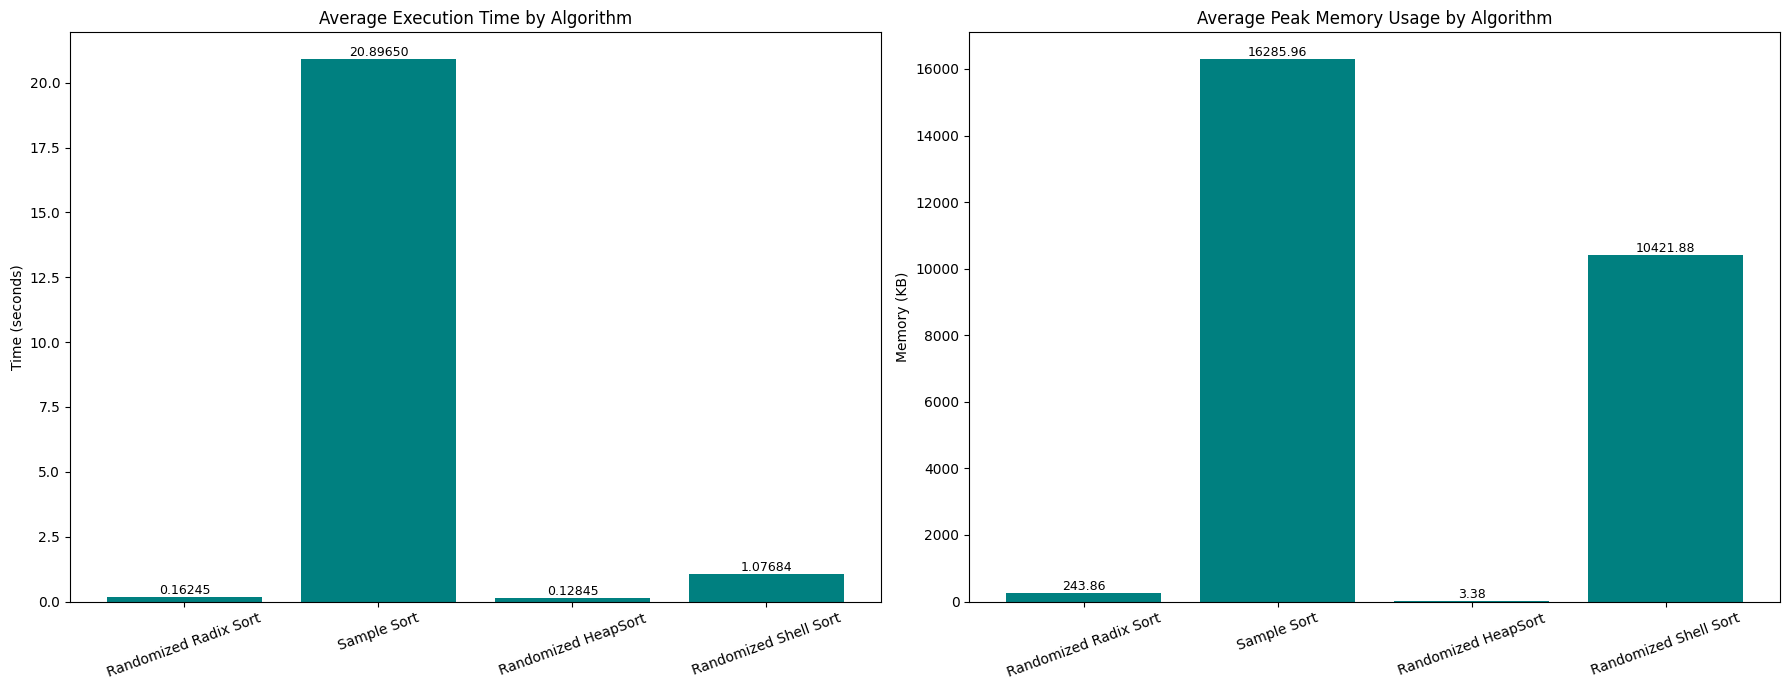

In [15]:
# Extract data
algorithms = [entry["Algorithm"] for entry in results_avg]
execution_times = [entry["Avg Execution Time (s)"] for entry in results_avg]
memory_usages = [entry["Avg Peak Memory (KB)"] for entry in results_avg]

# Create side-by-side subplots for Execution Time and Memory Usage
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Plot Execution Time
bars1 = axs[0].bar(algorithms, execution_times, color='teal')
axs[0].set_title("Average Execution Time by Algorithm")
axs[0].set_ylabel("Time (seconds)")
axs[0].tick_params(axis='x', rotation=20)
for bar, value in zip(bars1, execution_times):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.5f}', 
                ha='center', va='bottom', fontsize=9)

# Plot Memory Usage
bars2 = axs[1].bar(algorithms, memory_usages, color='teal')
axs[1].set_title("Average Peak Memory Usage by Algorithm")
axs[1].set_ylabel("Memory (KB)")
axs[1].tick_params(axis='x', rotation=20)
for bar, value in zip(bars2, memory_usages):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Observations

- **Randomized HeapSort is the best-performing algorithm**, completing the task in approximately **0.13 seconds** with a **peak memory usage of just 3.38 KB**. Its combination of speed and ultra-low memory usage makes it optimal for performance-critical and resource-constrained applications.

- **Sample Sort is the worst performer**, taking around **20.90 seconds** and consuming **16,285.96 KB** of memory on average. While it may benefit from parallelism in some contexts, its high overhead makes it unsuitable for large datasets in this implementation.

- **Randomized Radix Sort is also highly efficient**, finishing in **0.16 seconds** and using **243.86 KB** of memory. Although slightly slower than HeapSort, it remains a strong candidate for integer-based sorting with a good balance of speed and memory efficiency.

- **Randomized Shell Sort shows moderate results**, with an execution time of **1.08 seconds** and a memory footprint of **10,421.88 KB**. Its higher memory usage limits its practicality compared to HeapSort and Radix Sort.

- **The sharp contrast in performance metrics** across these algorithms highlights the impact of algorithmic design, particularly recursion, memory allocation strategy, and data access patterns, on real-world efficiency.

- **Recommendation**: **Randomized HeapSort** is the clear winner for applications that prioritize both speed and minimal memory usage.

### Top 5 Players

- **Sorts player scores for each round using Randomized HeapSort**, chosen for its consistently strong performance across all tested sorting algorithms.

- **Stores the top 5 players per round** in a dictionary (`top_5_per_round`) after sorting each round's scores in descending order.

- **Maintains and sorts cumulative scores for each player** across all rounds using Randomized HeapSort, producing an overall leaderboard (`total_scores_list`).

In [16]:
top_5_per_round = {}
player_total_scores = {}

for round_idx, data in enumerate(players_score_list, 1):
    # for data in players_score_list:
    arr = data.copy()
    randomized_heapsort(arr)
    # Save top 5 for this round
    top_5 = arr[-5:][::-1]
    top_5_per_round[f"Round {round_idx}"] = top_5

    # Update cumulative scores
    for player, score in data:
        if player in player_total_scores:
            player_total_scores[player] += score
        else:
            player_total_scores[player] = score

# Sort total scores using custom heap sort
total_scores_list = list(player_total_scores.items())
randomized_heapsort(total_scores_list)
total_scores_list.reverse()  # for descending order

##### Top 5 Players Based On Total Score

In [17]:
ranking = 5

for idx, player in enumerate(total_scores_list[:ranking], start=1):
    player_name = scores_df[scores_df['Player ID'] == player[0]]['Player Name'].values[0]
    print(
        wrapped(str(idx), len(str(idx)), 2),
        wrapped(str(player[1]), len(str(player[1])), 6),
        wrapped(player[0], len(player[0]), 12),
        wrapped(player_name, len(player_name), 18)
    )

1  599857 player_3640  Laura Doyle       
2  598797 player_2598  Randall Kim       
3  594176 player_7243  Ms. Dawn Wilson   
4  592161 player_1903  Dustin Flores     
5  590674 player_2155  Jermaine Santiago 


##### Extract Top 5 Players Details For Every Round And Total Score

In [18]:
if "Total Score" not in top_5_per_round.keys():
    top_5_per_round['Total Score'] = total_scores_list[:5]

for item in top_5_per_round:
    temp = top_5_per_round[item]
    rank_dict = {}
    for idx, element in enumerate(temp, start=1):
        rank_dict[f"Rank {idx} ID"] = element[0]
        rank_dict[f"Rank {idx} Score"] = element[1]
        rank_dict[f"Rank {idx} Name"] =  scores_df[scores_df['Player ID'] == element[0]]['Player Name'].values[0]
    top_5_per_round[item] = rank_dict

### Save Results in SQLite DB

- Creates (or connects to) a SQLite database named `player_rankings.db` and sets up a `TopPlayers` table to store the top 5 player details for each round, including their ID, score, and name.

- Dynamically builds column names for storing the top 5 rankings (e.g., "Rank 1 ID", "Rank 1 Score", "Rank 1 Name", etc.) and uses them to generate the table schema.

- Inserts or updates top 5 player data per round from the `top_5_per_round` dictionary into the database, ensuring that each round’s record is uniquely stored or replaced based on the round name.

In [19]:
# Connect to SQLite DB (or create if doesn't exist)
conn = sqlite3.connect("player_rankings.db")
cursor = conn.cursor()

# Define column names
columns = []
for i in range(1, 6):
    columns.extend([f'Rank {i} ID', f'Rank {i} Score', f'Rank {i} Name'])

# Create table query
create_query = f"""
CREATE TABLE IF NOT EXISTS TopPlayers (
    Round TEXT PRIMARY KEY,
    {', '.join([f'"{col}" TEXT' for col in columns])}
);
"""
cursor.execute(create_query)

# Insert data
for round_name, round_data in top_5_per_round.items():
    values = [round_data.get(col, None) for col in columns]
    placeholders = ', '.join(['?'] * len(values))
    insert_query = f"""
    INSERT OR REPLACE INTO TopPlayers (Round, {', '.join(['"' + col + '"' for col in columns])})
    VALUES (?, {placeholders});
    """
    cursor.execute(insert_query, [round_name] + values)

# Commit and close
conn.commit()
conn.close()

##### Display Head of `TopPlayers` Table

In [20]:
display_head()

,Round,Rank 1 ID,Rank 1 Score,Rank 1 Name,Rank 2 ID,Rank 2 Score,Rank 2 Name,Rank 3 ID,Rank 3 Score,Rank 3 Name,Rank 4 ID,Rank 4 Score,Rank 4 Name,Rank 5 ID,Rank 5 Score,Rank 5 Name
0,Round 1,player_7803,10000,Jennifer Escobar,player_2617,9999,Scott Young,player_2497,9998,Ruben Perkins,player_892,9997,Andrew Carr,player_2997,9996,James Davis
1,Round 2,player_5260,10000,Elizabeth Potts,player_2185,9999,Melanie Martin,player_1036,9998,Steven Church,player_4111,9997,Sara Bender,player_3975,9996,David White
2,Round 3,player_9606,10000,Cynthia Turner,player_9105,9999,Kevin Poole,player_5201,9998,Tanya Williams,player_9515,9997,Timothy Guerrero,player_7651,9996,Madeline Collins
3,Round 4,player_3723,10000,Robert Hughes,player_4598,9999,Elizabeth Glover,player_8988,9998,Mary Frost,player_5852,9997,Nicole Bautista,player_4008,9996,Gina James
4,Round 5,player_2511,10000,Craig Lawson,player_1102,9999,Denise Rush,player_3534,9998,Terry Sullivan,player_5835,9997,Dorothy Martinez DDS,player_4951,9996,Lori Walker
5,Round 6,player_7386,10000,Gabrielle Garcia,player_3026,9999,Barry Robertson,player_7144,9998,Roger Sanchez,player_4790,9997,Chad Schneider,player_6357,9996,Carlos Nelson
6,Round 7,player_6677,10000,Robert Meyer,player_1580,9999,Robert Robinson,player_9256,9998,Deborah Oconnell,player_4800,9997,Samuel Sanchez,player_7158,9996,Danielle Brooks
7,Round 8,player_8984,10000,Daniel Smith,player_2886,9999,Brittney Mccormick,player_1665,9998,Gail Brown,player_1164,9997,Jeffrey Thompson,player_7852,9996,Joshua Herring
8,Round 9,player_5854,10000,Nicholas James,player_7681,9999,Mark Cordova,player_7328,9998,Curtis Dunn,player_4199,9997,Christina Thompson,player_9112,9996,Melissa Gray
9,Round 10,player_6378,10000,Daniel White,player_6058,9999,Marcus Lopez,player_9247,9998,Tina Russell,player_5821,9997,Connor Rose,player_8106,9996,Kellie Peck


### Simple WebApp

- **Displays an interactive leaderboard** that allows users to select a specific round (or total scores) from a dropdown menu and view the top 5 ranked players in a visually styled HTML table.

- **Connects to a SQLite database** (`player_rankings.db`) to fetch and reshape data from the `TopPlayers` table, presenting it in a user-friendly, centered, and formatted layout.

- **Enhances the user interface with custom CSS styling**, improving readability and providing a clean, centered layout for both the dropdown and the rankings table.

In [22]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.0.0.203:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
^C


### WebApp UI

<p align="center">
  <img width="900" height="" src="Docs/Webapp.png">
</p>

---

<h1 align="center">References</h1>

### Randomized Radix Sort
- **Python implementation (GeeksforGeeks)**
    - A step-by-step guide to implementing Radix Sort in Python, focusing on digit-by-digit processing.
    - https://www.geeksforgeeks.org/python-program-for-radix-sort

- **Least Significant Digit (LSD) Radix Sort (GitHub)**
    - A Python package implementing LSD Radix Sort, extended to handle negative integers.
    - https://github.com/Sethfuchs/lsd_radixsort

- **Radix Sort tutorial (W3Schools)**
    - An overview of Radix Sort with implementation details and examples.
    - https://www.w3schools.com/dsa/dsa_algo_radixsort.php


### Sample Sort
- **Parallel Computing Textbook (Grama et al.)**
    - Detailed explanation of Sample Sort in the context of parallel computing.
    - https://www.pearson.com/en-us/subject-catalog/p/parallel-computing/P200000003470

-  **Super Scalar Sample Sort (Sanders & Winkel, 2004)**
    - Research paper introducing an optimized version of Sample Sort for modern hardware.
    - https://link.springer.com/chapter/10.1007/978-3-540-30140-0_16

- **GPU Sample Sort (GitHub)**
    - An open-source project implementing Sample Sort optimized for GPU architectures.
    - https://github.com/NVlabs/gpu-sample-sort


### Randomized Heap Sort
- **Heap Sort implementation (GeeksforGeeks)**
    - A Python implementation of Heap Sort, which can be adapted to include randomization.
    - https://www.geeksforgeeks.org/python-program-for-heap-sort

- **Randomized Heap (CP-Algorithms)**
    - Explanation of randomized heap data structures, useful for understanding randomized heap-based sorting.
    - https://cp-algorithms.com/data_structures/randomized_heap.html

- **heapq module documentation (Python)**
    - Official documentation for Python's `heapq` module, which can be utilized in implementing Heap Sort.
    - https://docs.python.org/3/library/heapq.html


### Randomized Shell Sort
- **Randomized Shellsort (Goodrich, 2010)**
    - cademic paper introducing a randomized, data-oblivious version of Shell Sort with O(n log n) time complexity.
    - https://dl.acm.org/doi/10.1145/2049697.2049701

- **Shell Sort implementation (GeeksforGeeks)**
    - A Python implementation of Shell Sort, which can be modified to include randomization techniques.
    - https://www.geeksforgeeks.org/python-program-for-shellsort

- **Shell Sort Visualizer (GitHub)**
    - A Python project visualizing the Shell Sort algorithm, helpful for educational purposes.
    - https://github.com/D3struf/Shell-Sort-Visualizer